## 1. Simple `numpy` function

The first part of this assignment gives you practice with python and numpy syntax and the homework submission process. In the next cell, you will find the outline of a `python` function. Modify it to return a `5 x 5` identity matrix by filling in the following code:
```python
        A= np.eye(5)
```

In [1]:
import numpy as np

In [2]:
print(np.eye(5))

[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


## 2 Linear regression with one variable

Now you will implement linear regression with one variable to predict profits for a food truck. Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities. You would like to use this data to help you select which city to expand to next.\
The file `"Uni_linear.txt"` contains the dataset for our linear regression problem. The first column is the population of a city (in 10,000s) and the second column is the profit of a food truck in that city (in $10,000s). A negative value for profit indicates a loss.

We provide you with the code needed to load this data. The dataset is loaded from the data file into the variables x and y:

In [3]:
import pandas as pd

In [4]:
chain_resturant = pd.read_csv("Uni_linear.txt", names= ["Population", "Profit"])
# type casting from pandas series to numpy array
X = np.array(chain_resturant["Population"])
y = np.array(chain_resturant["Profit"])
# size of dataset
number_of_samples = X.size
print('size of samples: {}'.format(number_of_samples))

size of samples: 97


In [5]:
chain_resturant.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [6]:
chain_resturant.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


In [7]:
print(f"Shape of X is: {X.shape}\nShape of y is: {y.shape}")

Shape of X is: (97,)
Shape of y is: (97,)


## 2.1 Plotting the Data

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

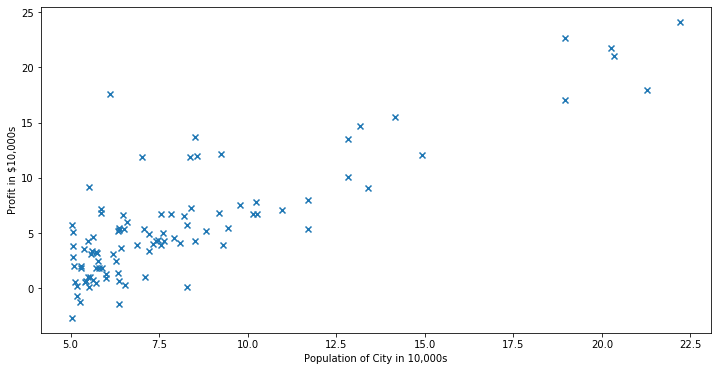

In [9]:
plt.figure(figsize=(12, 6))
plt.scatter(chain_resturant["Population"], chain_resturant["Profit"], marker= "x")
plt.xlabel("Population of City in 10,000s")
plt.ylabel("Profit in $10,000s")
plt.show()

### 2.2 Gradient Descent

In this part, you will fit the linear regression parameters $\theta$ to our dataset using gradient descent.

#### 2.2.1 Update Equations

The objective of linear regression is to minimize the cost function

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left( h_{\theta}(x^{(i)}) - y^{(i)}\right)^2$$

where the hypothesis $h_\theta(x)$ is given by the linear model
$$ h_\theta(x) = \theta^Tx = \theta_0 + \theta_1 x_1$$

Recall that the parameters of your model are the $\theta_j$ values. These are
the values you will adjust to minimize cost $J(\theta)$. One way to do this is to
use the batch gradient descent algorithm. In batch gradient descent, each
iteration performs the update

$$ \theta_j = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)}\right)x_j^{(i)} \qquad \text{simultaneously update } \theta_j \text{ for all } j$$

With each step of gradient descent, your parameters $\theta_j$ come closer to the optimal values that will achieve the lowest cost J($\theta$).


### 2.2.2 Implementation

We have already set up the data for linear regression. In the following cell, we add another dimension to our data to accommodate the $\theta_0$ intercept term. Do NOT execute this cell more than once.

In [10]:
# The first axis (axis=0) refers to rows (training examples) 
# and second axis (axis=1) refers to columns (features).
X = np.stack([np.ones(number_of_samples), X], axis=1)
print(f"Shape of X is: {X.shape}")

Shape of X is: (97, 2)


## 2.2.3 Computing the cost $J(\theta)$

As you perform gradient descent to learn minimize the cost function $J(\theta)$, it is helpful to monitor the convergence by computing the cost. In this section, you will implement a function to calculate $J(\theta)$ so you can check the convergence of your gradient descent implementation. 

Your next task is to complete the code for the function `cost_function` which computes $J(\theta)$. As you are doing this, remember that the variables $X$ and $y$ are not scalar values. $X$ is a matrix whose rows represent the examples from the training set and $y$ is a vector whose each elemennt represent the value at a given row of $X$.
<a id="computeCost"></a>

In [11]:
def cost_function(X, y, theta):
    """
    Compute cost for linear regression with multiple variables.
    Computes the cost of using theta as the parameter for linear regression to fit the data points in X and y.
    
    Parameters
    ----------
    X : array_like
        The dataset of shape (m x n+1).
    
    y : array_like
        A vector of shape (m, ) for the values at a given data point.
    
    theta : array_like
        The linear regression parameters. A vector of shape (n+1, )
    
    Returns
    -------
    J : float
        The value of the cost function. 
    """
    # size of dataset
    number_of_samples = y.size
    #initialize cost function with zero
    J = 0
    # hypothesis function
    h = np.dot(X, theta)
    # computation of cost function 
    J = (1/(2 * number_of_samples)) * np.sum(np.square(np.dot(X, theta) - y))
    return J

In [12]:
J = cost_function(X, y, theta= np.array([0.0, 0.0]))
print("Cost computed: {:.2f} \nwith theta [0.0, 0.0]".format(J))
J = cost_function(X, y, theta= np.array([3.0, 2.0]))
print("Cost computed: {:.2f} \nwith theta [3.0, 2.0]".format(J))

Cost computed: 32.07 
with theta [0.0, 0.0]
Cost computed: 100.16 
with theta [3.0, 2.0]


#### 2.2.4 Gradient descent

Next, you will complete a function which implements gradient descent.\
As you program, make sure you understand what you are trying to optimize and what is being updated. Keep in mind that the cost $J(\theta)$ is parameterized by the vector $\theta$, not $X$ and $y$. That is, we minimize the value of $J(\theta)$ by changing the values of the vector $\theta$, not by changing $X$ or $y$. A good way to verify that gradient descent is working correctly is to look at the value of $J(\theta)$ and check that it is decreasing with each step. 

The starter code for the function `gradient_descent` calls `cost_function` on every iteration and saves the cost to a `python` list. Assuming you have implemented gradient descent and `cost_function` correctly, your value of $J(\theta)$ should never increase, and should converge to a steady value by the end of the algorithm.


In [13]:
def gradient_descent(X, y, theta, learning_rate, iteration):
    """
    Performs gradient descent to learn theta.
    Updates theta by taking num_iters gradient steps with learning rate alpha.
        
    Parameters
    ----------
    X : array_like
        The dataset of shape (m x n+1).
    
    y : array_like
        A vector of shape (m, ) for the values at a given data point.
    
    theta : array_like
        The linear regression parameters. A vector of shape (n+1, )
    
    learning_rate : float
        The learning rate for gradient descent. 
    
    iteration : int
        The number of iterations to run gradient descent. 
    
    Returns
    -------
    theta : array_like
        The learned linear regression parameters. A vector of shape (n+1, ).
    
    J_history : list
        A python list for the values of the cost function after each iteration.
        
    theta_history : list
        A python list for the values of theta per each iteration and store them in a list
    
    """
    # number of elements or trainting examples
    number_of_samples = len(y)
    # make a copy of theta to avoid changing original array
    theta = theta.copy()
    J_history = []
    theta_history = []
    # loop through iterations
    for item in range(iteration):
        theta = theta - (learning_rate/number_of_samples) * (np.dot(X, theta) - y).dot(X)
        theta_history.append(theta)
        J_history.append(cost_function(X, y, theta))
    return theta, J_history, theta_history

In [14]:
# initial theta for starting cost_function and gradient_descent that is theta= [0,0]
theta = np.zeros(2)
# set learning_rate(alpha in original formula) and iteration(number of running algorithm)
learning_rate = .02
iteration = 1500
# running algorithm and store them variable and lists
theta, cost_function_history, theta_history = gradient_descent(X, y, theta, learning_rate, iteration)

In [15]:
print("Theta found by gradient descent: {:.4f}, {:.4f}".format(theta[0], theta[1]))
print("Mean cost values:  {:0.3f}".format(np.mean(cost_function_history)))

Theta found by gradient descent: -3.8781, 1.1913
Mean cost values:  4.622


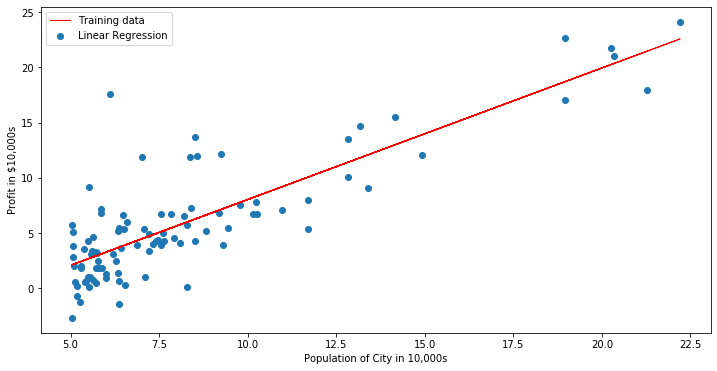

In [16]:
plt.figure(figsize=(12, 6))
plt.scatter(chain_resturant["Population"], chain_resturant["Profit"], marker= "o")
plt.plot(X[:,1], np.dot(X, theta), linewidth=1.0, c= "red")
plt.xlabel("Population of City in 10,000s")
plt.ylabel("Profit in $10,000s")
plt.legend(["Training data", "Linear Regression"])
plt.show()

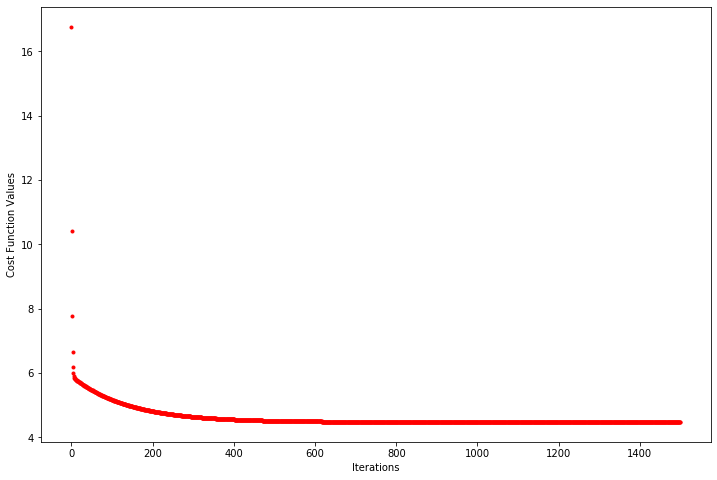

In [17]:
fig,ax = plt.subplots(figsize=(12,8))
ax.set_ylabel("Cost Function Values")
ax.set_xlabel("Iterations")
ax.plot(range(iteration), cost_function_history, "r.")
plt.show()

First 200 iteration

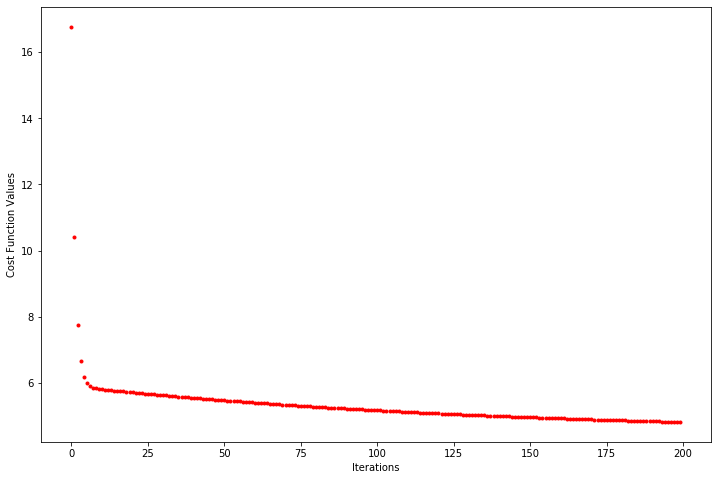

In [18]:
fig,ax = plt.subplots(figsize=(12,8))
ax.set_ylabel("Cost Function Values")
ax.set_xlabel("Iterations")
ax.plot(range(200), cost_function_history[:200], "r.")
plt.show()

## stocashtic_gradient_descent

In [19]:
def stocashtic_gradient_descent(X, y, theta, learning_rate, iteration):
    number_of_samples = len(y)
    J_history = []
    theta_history = []
    for item in range(iteration):
        J = 0
        for i in range(number_of_samples):
            random_index = np.random.randint(0,number_of_samples)
            X_i = X[random_index,:].reshape(1,X.shape[1])
            y_i = y[random_index].reshape(1,1)
            theta = theta - (((learning_rate) * (1/number_of_samples))* (np.dot(X_i, theta) - y_i).dot(X_i)).reshape(2,)
        theta_history.append(theta)
        J_history.append(cost_function(X_i, y_i, theta))
    return theta, J_history, theta_history

In [20]:
# initial theta for starting cost_function and gradient_descent that is theta= [0,0]
theta = np.zeros(2)
# set learning_rate(alpha in original formula) and iteration(number of running algorithm)
learning_rate = .1
iteration = 100
# running algorithm and store them variable and lists
theta, cost_function_history,theta_history = stocashtic_gradient_descent(X, y, theta, learning_rate, iteration)

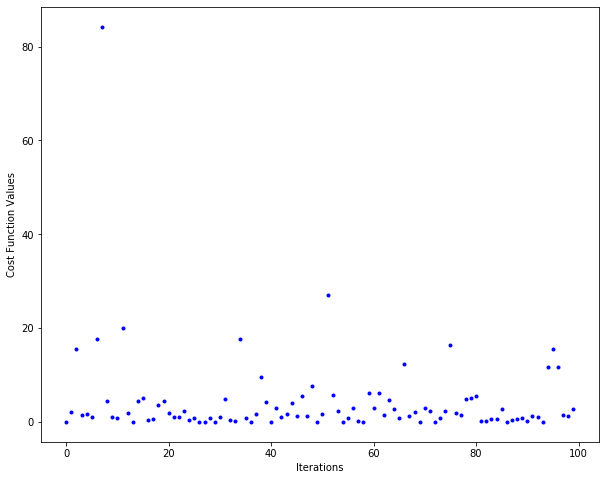

In [21]:
fig,ax = plt.subplots(figsize=(10,8))
ax.plot(range(iteration),cost_function_history,'b.')
ax.set_ylabel("Cost Function Values")
ax.set_xlabel("Iterations")
theta = np.random.randn(2,1)
plt.show()

In [22]:
print("Theta found by gradient descent: {:.4f}, {:.4f}".format(float(theta_history[-1][0]), float(theta_history[-1][1])))
print('Mean cost values:  {:0.3f}'.format(np.mean(cost_function_history)))

Theta found by gradient descent: -3.2622, 1.0533
Mean cost values:  4.253


## Mini batch gradient descent

In [23]:
def minibatch_gradient_descent(X , y, theta, learning_rate, iteration, batch_size):
    number_of_samples = len(y)
    n_batches = int(number_of_samples/batch_size)
    J_history = []
    theta_history = []
    for item in range(iteration):
        J = 0
        indices = np.random.permutation(number_of_samples)
        X = X[indices]
        y = y[indices]
        for i in range(0, number_of_samples, batch_size):
            X_i = X[i:i+batch_size]
            y_i = y[i:i+batch_size]
            theta = theta - (((learning_rate) * (1/number_of_samples))* (np.dot(X_i, theta) - y_i).dot(X_i)).reshape(2,)
        theta_history.append(theta)
        J_history.append(cost_function(X_i, y_i, theta))
    return theta, J_history, theta_history

In [24]:
# initial theta for starting cost_function and gradient_descent that is theta= [0,0]
theta = np.zeros(2)
# set learning_rate(alpha in original formula) and iteration(number of running algorithm)
learning_rate = .05
iteration = 200
batch_size = 5
# running algorithm and store them variable and lists
theta, cost_function_history,theta_history = minibatch_gradient_descent(X, y, theta, learning_rate, iteration, batch_size)

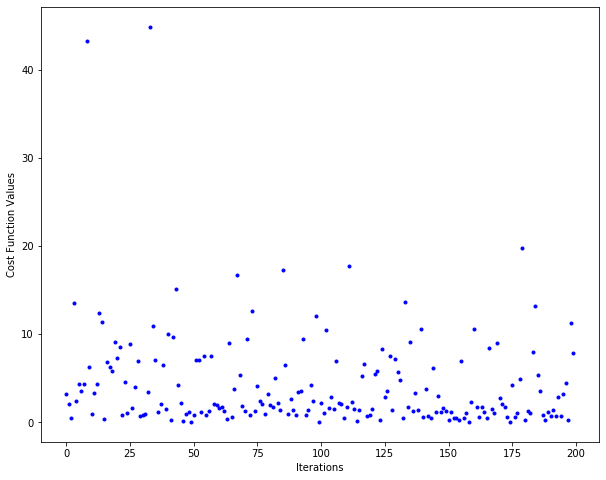

In [25]:
fig,ax = plt.subplots(figsize=(10,8))
ax.plot(range(iteration),cost_function_history,'b.')
ax.set_ylabel("Cost Function Values")
ax.set_xlabel("Iterations")
plt.show()

In [26]:
print("Theta found by gradient descent: {:.4f}, {:.4f}".format(float(theta[0]), float(theta[1])))
print('Mean cost values:  {:0.3f}'.format(np.mean(cost_function_history)))

Theta found by gradient descent: -3.2536, 1.1555
Mean cost values:  4.252


## 3 Linear regression with multiple variables

In this part, you will implement linear regression with multiple variables to predict the prices of houses. Suppose you are selling your house and you want to know what a good market price would be. One way to do this is to first collect information on recent houses sold and make a model of housing prices.

The file `Multi_linear.txt` contains a training set of housing prices in Portland, Oregon. The first column is the size of the house (in square feet), the second column is the number of bedrooms, and the third column is the price
of the house. 
### 3.1 Feature Normalization

We start by loading and displaying some values from this dataset. By looking at the values, note that house sizes are about 1000 times the number of bedrooms. When features differ by orders of magnitude, first performing feature scaling can make gradient descent converge much more quickly.

In [27]:
houses = pd.read_csv("Multi_linear.txt", names=["Size of House(ft2)", "Number of Bedrooms", "Price"])
# type casting from pandas series to numpy array
X = np.array(houses.iloc[:,:2])
y = np.array(houses.iloc[:,2])
# size of dataset
number_of_samples = y.size
print('size of samples: {}'.format(number_of_samples))

size of samples: 47


Your task here is to complete the code in `feature_normalization` function:
- Subtract the mean value of each feature from the dataset.
- After subtracting the mean, additionally scale (divide) the feature values by their respective “standard deviations.”

The standard deviation is a way of measuring how much variation there is in the range of values of a particular feature (most data points will lie within ±2 standard deviations of the mean); this is an alternative to taking the range of values (max-min). In `numpy`, you can use the `std` function to compute the standard deviation. 

For example, the quantity `X[:, 0]` contains all the values of $x_1$ (house sizes) in the training set, so `np.std(X[:, 0])` computes the standard deviation of the house sizes.
At the time that the function `feature_normalization` is called, the extra column of 1’s corresponding to $x_0 = 1$ has not yet been added to $X$. 

You will do this for all the features and your code should work with datasets of all sizes (any number of features / examples). Note that each column of the matrix $X$ corresponds to one feature.

In [28]:
def feature_normalization(X):
    
    standard_deviation = np.std(X, axis= 0)
    mean = np.mean(X, axis= 0)
    X_normalized = (X - mean)/ standard_deviation
    
    return X_normalized, mean, standard_deviation

In [29]:
normalized_X, mean_X, standard_deviation_X = feature_normalization(X)

In [30]:
print("Below information is for two colums:\nfirst: [Size of House(ft2), and second: Number of Bedrooms]")
print("Mean: {}".format(mean_X))
print("Standard Deviation: {:}".format(standard_deviation_X))

Below information is for two colums:
first: [Size of House(ft2), and second: Number of Bedrooms]
Mean: [2000.68085106    3.17021277]
Standard Deviation: [7.86202619e+02 7.52842809e-01]


### 3.2 Gradient Descent

Previously, you implemented gradient descent on a univariate regression problem. The only difference now is that there is one more feature in the matrix $X$. The hypothesis function and the batch gradient descent update
rule remain unchanged. 

You should complete the code for the functions `computeCostMulti` and `gradientDescentMulti` to implement the cost function and gradient descent for linear regression with multiple variables. If your code in the previous part (single variable) already supports multiple variables, you can use it here too.
Make sure your code supports any number of features and is well-vectorized.
You can use the `shape` property of `numpy` arrays to find out how many features are present in the dataset.


**Implementation Note:** In the multivariate case, the cost function can
also be written in the following vectorized form:

$$ J(\theta) = \frac{1}{2m}(X\theta - \vec{y})^T(X\theta - \vec{y}) $$

where 

$$ X = \begin{pmatrix}
          - (x^{(1)})^T - \\
          - (x^{(2)})^T - \\
          \vdots \\
          - (x^{(m)})^T - \\ \\
        \end{pmatrix} \qquad \mathbf{y} = \begin{bmatrix} y^{(1)} \\ y^{(2)} \\ \vdots \\ y^{(m)} \\\end{bmatrix}$$

the vectorized version is efficient when you are working with numerical computing tools like `numpy`. If you are an expert with matrix operations, you can prove to yourself that the two forms are equivalent.


In [31]:
# The first axis (axis=0) refers to rows (training examples) 
# and second axis (axis=1) refers to columns (features).
# add ones to normalized_X to make features same shape as theta 
X = np.concatenate([np.ones(len(y)).reshape(len(y), 1), normalized_X], axis= 1)
print(f"Shape of X is: {X.shape}")

Shape of X is: (47, 3)


In [32]:
def cost_function(X, y, theta):
    """
    Compute cost for linear regression with multiple variables.
    Computes the cost of using theta as the parameter for linear regression to fit the data points in X and y.
    
    Parameters
    ----------
    X : array_like
        The dataset of shape (m x n+1).
    
    y : array_like
        A vector of shape (m, ) for the values at a given data point.
    
    theta : array_like
        The linear regression parameters. A vector of shape (n+1, )
    
    Returns
    -------
    J : float
        The value of the cost function. 
    """
    # size of dataset
    number_of_samples = y.size
    #initialize cost function with zero
    J = 0
    # hypothesis function
    h = np.dot(X, theta)
    # computation of cost function 
    J = (1/(2 * number_of_samples)) * np.sum(np.square(np.dot(X, theta) - y))
    return J

In [39]:
J = cost_function(X, y, theta= np.array([0.0, 0.0, 0.0]))
print("Cost computed: {:.2f} \nwith theta [0.0, 0.0, 0.0]".format(J))
J = cost_function(X, y, theta= np.array([30000.0, 2102.0, 511.0]))
print("Cost computed: {:.2f} \nwith theta [30000.0, 2102.0, 511.0]".format(J))

Cost computed: 65591548106.46 
with theta [0.0, 0.0, 0.0]
Cost computed: 55581837138.30 
with theta [30000.0, 2102.0, 511.0]


In [40]:
def gradient_descent(X, y, theta, learning_rate, iteration):
    """
    Performs gradient descent to learn theta.
    Updates theta by taking num_iters gradient steps with learning rate alpha.
        
    Parameters
    ----------
    X : array_like
        The dataset of shape (m x n+1).
    
    y : array_like
        A vector of shape (m, ) for the values at a given data point.
    
    theta : array_like
        The linear regression parameters. A vector of shape (n+1, )
    
    learning_rate : float
        The learning rate for gradient descent. 
    
    iteration : int
        The number of iterations to run gradient descent. 
    
    Returns
    -------
    theta : array_like
        The learned linear regression parameters. A vector of shape (n+1, ).
    
    J_history : list
        A python list for the values of the cost function after each iteration.
        
    theta_history : list
        A python list for the values of theta per each iteration and store them in a list
    
    """
    # number of elements or trainting examples
    number_of_samples = len(y)
    # make a copy of theta to avoid changing original array
    theta = theta.copy()
    J_history = []
    theta_history = []
    # loop through iterations
    for item in range(iteration):
        theta = theta - (learning_rate/number_of_samples) * (np.dot(X, theta) - y).dot(X)
        theta_history.append(theta)
        J_history.append(cost_function(X, y, theta))
    return theta, J_history, theta_history

In [41]:
# initial theta for starting cost_function and gradient_descent that is theta= [0,0]
theta = np.zeros(3)
# set learning_rate(alpha in original formula) and iteration(number of running algorithm)
learning_rate = .02
iteration = 500
# running algorithm and store them variable and lists
theta, cost_function_history, theta_history = gradient_descent(X, y, theta, learning_rate, iteration)

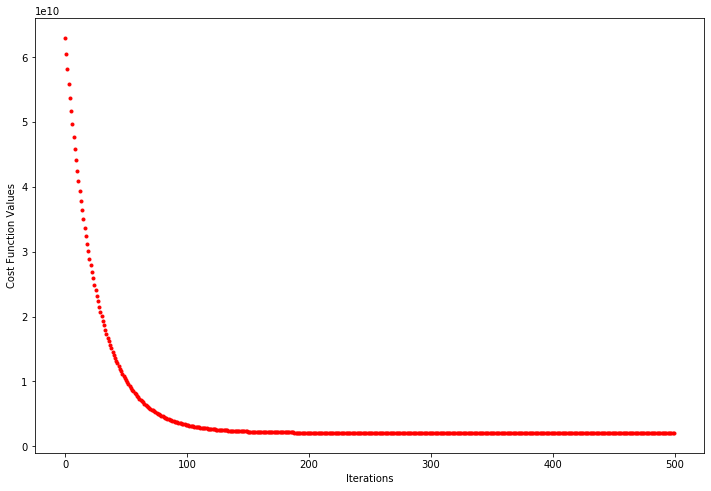

In [42]:
fig,ax = plt.subplots(figsize=(12,8))
ax.set_ylabel("Cost Function Values")
ax.set_xlabel("Iterations")
ax.plot(range(iteration), cost_function_history, "r.")
plt.show()

In [43]:
print("Theta found by gradient descent: {:.4f}, {:.4f}, {:.4f}".format(theta[0], theta[1], theta[2]))
print("Final cost value:  {:0.3f}".format(cost_function_history[-1]))

Theta found by gradient descent: 340398.6945, 108749.5109, -5880.0828
Final cost value:  2043494705.173


### 3.3 Normal Equations

In the lecture videos, you learned that the closed-form solution to linear regression is

$$ \theta = \left( X^T X\right)^{-1} X^T\vec{y}$$

Using this formula does not require any feature scaling, and you will get an exact solution in one calculation: there is no “loop until convergence” like in gradient descent. 

First, we will reload the data to ensure that the variables have not been modified. Remember that while you do not need to scale your features, we still need to add a column of 1’s to the $X$ matrix to have an intercept term ($\theta_0$). The code in the next cell will add the column of 1’s to X for you.

In [44]:
houses = pd.read_csv("Multi_linear.txt", names=["Size of House(ft2)", "Number of Bedrooms", "Price"])
# type casting from pandas series to numpy array
X = np.array(houses.iloc[:,:2])
y = np.array(houses.iloc[:,2])
# size of dataset
number_of_samples = y.size
print('size of samples: {}'.format(number_of_samples))

size of samples: 47


In [45]:
# The first axis (axis=0) refers to rows (training examples) 
# and second axis (axis=1) refers to columns (features).
# add ones to normalized_X to make features same shape as theta 
X = np.concatenate([np.ones(len(y)).reshape(len(y), 1), normalized_X], axis= 1)
print(f"Shape of X is: {X.shape}")

Shape of X is: (47, 3)


In [47]:
def normal_equation(X, y):
    """
    Computes the closed-form solution to linear regression using the normal equations.
    
    Parameters
    ----------
    X : array_like
        The dataset of shape (m x n+1).
    
    y : array_like
        The value at each data point. A vector of shape (m, ).
    
    Returns
    -------
    theta : array_like
        Estimated linear regression parameters. A vector of shape (n+1, ).
    """
    # initialize theta with zero values
    theta = np.zeros(X.shape[1])
    theta = np.dot(np.dot(np.linalg.pinv(np.dot(X.T, X)), X.T), y)
    return theta

In [48]:
theta = normal_equation(X, y)

In [53]:
print("Theta computed from the normal equations: {:s}".format(str(theta)))

Theta computed from the normal equations: [340412.65957447 109447.79646964  -6578.35485416]
